In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

listings = pd.read_csv('listings.csv')


In [79]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [80]:
listings.review_scores_value.head()

0    10.0
1    10.0
2    10.0
3     NaN
4     9.0
Name: review_scores_value, dtype: float64

In [81]:
listings.security_deposit.unique()

array([nan, '$100.00', '$1,000.00', '$700.00', '$150.00', '$500.00',
       '$300.00', '$400.00', '$1,500.00', '$250.00', '$200.00', '$750.00',
       '$140.00', '$350.00', '$600.00', '$95.00', '$5,000.00', '$125.00',
       '$800.00', '$499.00', '$399.00', '$450.00', '$995.00', '$2,500.00',
       '$175.00', '$225.00', '$550.00', '$115.00', '$120.00', '$99.00',
       '$149.00', '$780.00', '$2,000.00', '$1,200.00', '$360.00',
       '$375.00', '$199.00', '$109.00', '$449.00', '$195.00', '$295.00',
       '$185.00', '$134.00', '$650.00', '$180.00', '$1,900.00', '$220.00'],
      dtype=object)

In [82]:
listings.host_since.sort_values();

In [83]:
# convert price into float
def removefromstring(df, col_str):
    for col in col_str:
        df[f'{col}_int'] = df[col].str.replace("$","").str.replace(",","")
        df[f'{col}_int'] = df[f'{col}_int'].astype('float')
    return df

In [84]:
# apply removefromstring function to convert price columns into float
col_str = ['extra_people','price', 'weekly_price','monthly_price','cleaning_fee','security_deposit']
listings = removefromstring(listings,col_str)

In [85]:
listings[['extra_people','extra_people_int','price','price_int','weekly_price','weekly_price_int','monthly_price','monthly_price_int','cleaning_fee','cleaning_fee_int','security_deposit','security_deposit_int']];

In [86]:
# create dummy variables for categories (splitting categorical value)
def create_dummy_df(df, cat_cols, dummy_na):
    
    
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [87]:
cat_cols = ['room_type','property_type','neighbourhood_group_cleansed']

In [88]:
dummy_df = create_dummy_df(listings, cat_cols, False)

In [89]:
dummy_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,0,0,0,0,0,1,0,0,0,0
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,0,0,0,0,0,1,0,0,0,0
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,0,0,0,0,0,1,0,0,0,0
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,0,0,0,0,0,1,0,0,0,0
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,0,0,0,0,0,1,0,0,0,0


In [90]:
dummy_df.columns.to_list()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'guests_

In [91]:
cat_df = dummy_df.select_dtypes(include=['object'])
cat_cols_lst = cat_df.columns
cat_cols_lst

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed', 'city', 'state',
       'zipcode', 'market', 'smart_location', 'country_code', 'country',
       'is_location_exact', 'bed_type', 'amenities', 'price', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people',
       'calendar_updated', 'has_availability', 'calendar_last_scraped',
       'first_review', 'last_review', 'requires_license', 'jurisdic

In [92]:
def clean_data(df):
    df = df.dropna(how='all', axis=1)
    y = df.price_int
    cat_df = df.select_dtypes(include=['object'])
    cat_cols_lst = cat_df.columns
    df= df.drop(cat_cols_lst,axis=1)
    df = df.drop(['id', 'scrape_id', 'host_id', 'price_int'],axis=1)
    #df= df.drop(['price','neighbourhood','id', 'listing_url', 'scrape_id'],axis=1)
    num_col = df.select_dtypes(include=['float', 'int']).columns
    for col in num_col: 
        df[col].fillna(df[col].mean(),inplace=True)
    

    X = df
    
    
    return X, y
#Use the function to create X and y
X, y = clean_data(dummy_df)    

In [93]:

X=X.drop(['host_listings_count', 'host_total_listings_count', 'latitude',
       'longitude'],axis=1)



In [94]:
X.columns.to_list()

['accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'square_feet',
 'guests_included',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'calculated_host_listings_count',
 'reviews_per_month',
 'extra_people_int',
 'weekly_price_int',
 'monthly_price_int',
 'cleaning_fee_int',
 'security_deposit_int',
 'room_type_Private room',
 'room_type_Shared room',
 'property_type_Bed & Breakfast',
 'property_type_Boat',
 'property_type_Bungalow',
 'property_type_Cabin',
 'property_type_Camper/RV',
 'property_type_Chalet',
 'property_type_Condominium',
 'property_type_Dorm',
 'property_type_House',
 'property_type_Loft',
 'property_type_Other',
 'property_type_Tent',
 'property_type_Townhouse',
 'property_type_Treehou

In [95]:

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit 
    
#Predict and score the model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)
    
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)
  

In [96]:
#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))


The rsquared on the training data was 0.6575540186711042.  The rsquared on the test data was 0.6588765448925897.


In [97]:


def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
30,property_type_Boat,149.231031,149.231031
33,property_type_Camper/RV,68.276500,68.276500
28,room_type_Shared room,-53.658905,53.658905
34,property_type_Chalet,44.009820,44.009820
36,property_type_Dorm,-39.511836,39.511836
52,neighbourhood_group_cleansed_Magnolia,32.713092,32.713092
40,property_type_Tent,-31.198237,31.198237
43,property_type_Yurt,30.003173,30.003173
49,neighbourhood_group_cleansed_Downtown,27.930759,27.930759
32,property_type_Cabin,25.902336,25.902336


In [31]:
listings_corr = listings.corr();


In [98]:
# negative correlation between price and Private room type 
dummy_df['price_int'].corr(dummy_df['room_type_Private room'])

-0.3875019951626085

In [99]:
listings = pd.read_csv('listings.csv')


In [101]:
col_str = ['extra_people','price', 'weekly_price','monthly_price','cleaning_fee','security_deposit']
listings = removefromstring(listings,col_str)

In [102]:
price_property = listings.groupby('property_type').mean()['price_int'].sort_values(ascending = False)

In [81]:
price_property

property_type
Boat               282.375000
Condominium        151.109890
Loft               135.700000
House              132.351414
Townhouse          129.457627
Apartment          122.932670
Camper/RV          120.461538
Bungalow           115.615385
Bed & Breakfast    112.054054
Cabin              104.666667
Treehouse          101.000000
Yurt               100.000000
Chalet              98.500000
Other               94.681818
Tent                54.000000
Dorm                39.500000
Name: price_int, dtype: float64

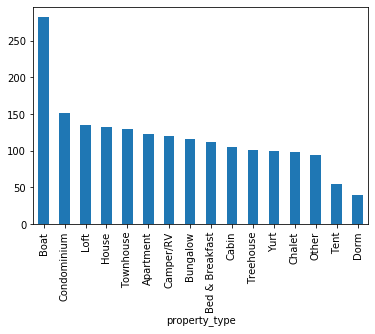

In [103]:
price_property.plot(kind = 'bar');

In [108]:
neighbourhood_price = listings.groupby('neighbourhood_group_cleansed').mean()['monthly_price_int'].sort_values(ascending = False)


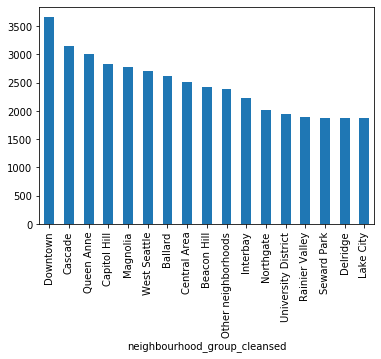

In [109]:
neighbourhood_price.plot(kind = 'bar');

In [112]:
neighbourhood_price = listings.groupby('neighbourhood_group_cleansed').mean()['price_int'].sort_values(ascending = False)

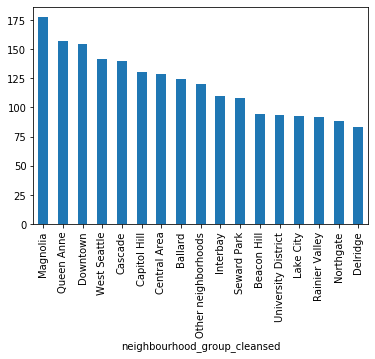

In [113]:
neighbourhood_price.plot(kind = 'bar');

In [114]:

neighbourhood_price

neighbourhood_group_cleansed
Magnolia               177.672131
Queen Anne             157.223729
Downtown               154.405660
West Seattle           141.359606
Cascade                140.101124
Capitol Hill           130.592593
Central Area           128.338753
Ballard                124.682609
Other neighborhoods    119.968514
Interbay               109.727273
Seward Park            108.477273
Beacon Hill             94.669492
University District     93.639344
Lake City               92.671642
Rainier Valley          91.899371
Northgate               88.550000
Delridge                83.278481
Name: price_int, dtype: float64

In [115]:
no_review = listings.groupby('neighbourhood_group_cleansed').sum()['number_of_reviews'].sort_values(ascending = False)


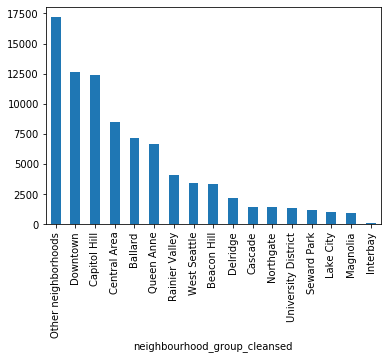

In [116]:
no_review.plot(kind = 'bar');

What are the busiest times of the year to visit Seattle? 

In [120]:
calendar = pd.read_csv('calendar.csv')
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [121]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [122]:
# count of unique lisitng_id
calendar.listing_id.nunique()

3818

In [123]:
#What are the busiest times of the year to visit Seattle? 
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [124]:
# change date format into yyyy-mm
calendar['date_m'] = calendar['date'].str[:7] 


In [125]:
calendar.head()

,listing_id,date,available,price,date_m
0,241032,2016-01-04,t,$85.00,2016-01
1,241032,2016-01-05,t,$85.00,2016-01
2,241032,2016-01-06,f,NaN,2016-01
3,241032,2016-01-07,f,NaN,2016-01
4,241032,2016-01-08,f,NaN,2016-01


In [126]:
calendar['price_num'] = calendar['price'].str.replace("$","").str.replace(",","")

In [127]:
calendar['price_num'] = calendar['price_num'].astype('float')

In [128]:
calendar.head()

,listing_id,date,available,price,date_m,price_num
0,241032,2016-01-04,t,$85.00,2016-01,85.0
1,241032,2016-01-05,t,$85.00,2016-01,85.0
2,241032,2016-01-06,f,NaN,2016-01,NaN
3,241032,2016-01-07,f,NaN,2016-01,NaN
4,241032,2016-01-08,f,NaN,2016-01,NaN


In [129]:
cal_t = calendar[calendar.available == 't']

In [130]:
cal_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 6 columns):
listing_id    934542 non-null int64
date          934542 non-null object
available     934542 non-null object
price         934542 non-null object
date_m        934542 non-null object
price_num     934542 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 49.9+ MB


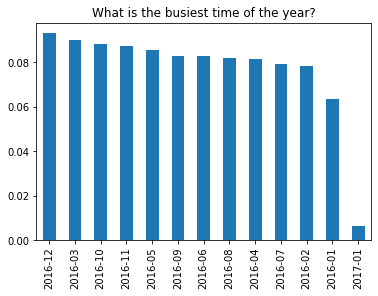

In [131]:
status_vals = cal_t.date_m.value_counts()#Provide a pandas series of the counts for each month 

# a bar chart of the proportion of individuals in each month of the year 

(status_vals/cal_t.shape[0]).plot(kind="bar");
plt.title("What is the busiest time of the year?");

In [132]:
price_month = cal_t.groupby(['date_m']).mean()['price_num']
price_month.sort_values()

date_m
2016-01    121.568409
2016-02    124.293927
2016-03    128.644488
2016-04    135.097005
2016-11    135.688738
2017-01    136.882590
2016-10    137.031939
2016-12    137.251835
2016-05    139.538183
2016-09    143.255949
2016-06    147.473137
2016-08    150.656594
2016-07    152.094150
Name: price_num, dtype: float64

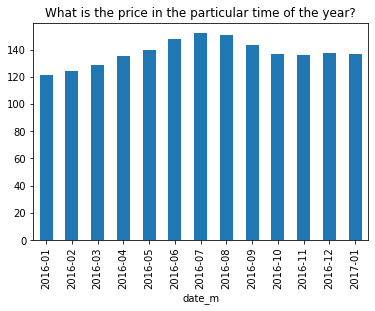

In [133]:
price_month.plot(kind="bar");
plt.title("What is the price in the particular time of the year?");

Can you describe the vibe of each Seattle neighborhood using listing descriptions?

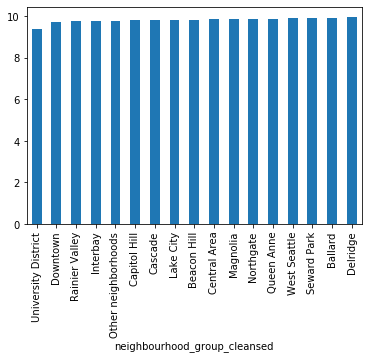

In [169]:
prop_type_com = listings.groupby(['neighbourhood_group_cleansed']).mean()['review_scores_communication'].sort_values()
prop_type_com.plot(kind="bar");

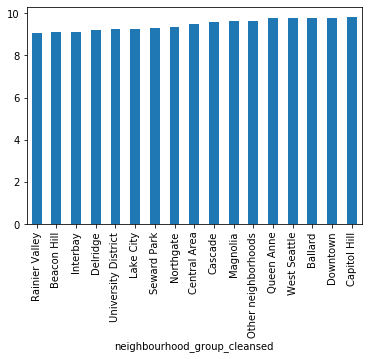

In [170]:
prop_type_loc = listings.groupby(['neighbourhood_group_cleansed']).mean()['review_scores_location'].sort_values()
prop_type_loc.plot(kind="bar");

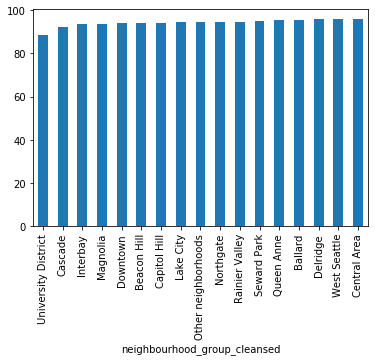

In [171]:
prop_type_rate = listings.groupby(['neighbourhood_group_cleansed']).mean()['review_scores_rating'].sort_values()
prop_type_rate.plot(kind="bar");

In [172]:
prop_type_rate

neighbourhood_group_cleansed
University District    88.437500
Cascade                92.461538
Interbay               93.777778
Magnolia               93.787234
Downtown               93.958333
Beacon Hill            94.019417
Capitol Hill           94.184783
Lake City              94.375000
Other neighborhoods    94.562500
Northgate              94.692308
Rainier Valley         94.731343
Seward Park            95.025641
Queen Anne             95.443089
Ballard                95.533679
Delridge               95.861538
West Seattle           95.864198
Central Area           96.009404
Name: review_scores_rating, dtype: float64

In [173]:
listings.groupby('neighbourhood_group_cleansed').sum()['number_of_reviews'].sort_values(ascending=False)

neighbourhood_group_cleansed
Other neighborhoods    17210
Downtown               12606
Capitol Hill           12412
Central Area            8442
Ballard                 7118
Queen Anne              6613
Rainier Valley          4085
West Seattle            3407
Beacon Hill             3355
Delridge                2197
Cascade                 1420
Northgate               1389
University District     1316
Seward Park             1195
Lake City               1028
Magnolia                 933
Interbay                 123
Name: number_of_reviews, dtype: int64

In [145]:
listings.groupby('neighbourhood_group_cleansed').mean()['price_int'].sort_values()

neighbourhood_group_cleansed
Delridge                83.278481
Northgate               88.550000
Rainier Valley          91.899371
Lake City               92.671642
University District     93.639344
Beacon Hill             94.669492
Seward Park            108.477273
Interbay               109.727273
Other neighborhoods    119.968514
Ballard                124.682609
Central Area           128.338753
Capitol Hill           130.592593
Cascade                140.101124
West Seattle           141.359606
Downtown               154.405660
Queen Anne             157.223729
Magnolia               177.672131
Name: price_int, dtype: float64

In [149]:
listings.groupby('neighbourhood_group_cleansed').mean()['monthly_price_int'].sort_values()

neighbourhood_group_cleansed
Lake City              1867.000000
Delridge               1869.315789
Seward Park            1880.761905
Rainier Valley         1893.301370
University District    1950.308824
Northgate              2015.244444
Interbay               2224.000000
Other neighborhoods    2389.019231
Beacon Hill            2414.976744
Central Area           2503.832215
Ballard                2622.666667
West Seattle           2698.789474
Magnolia               2772.666667
Capitol Hill           2823.843931
Queen Anne             3004.655914
Cascade                3151.605263
Downtown               3661.154696
Name: monthly_price_int, dtype: float64

In [50]:
listings.groupby('neighbourhood_group_cleansed').mean()['number_of_reviews'].sort_values()

neighbourhood_group_cleansed
University District    10.786885
Interbay               11.181818
Magnolia               15.295082
Lake City              15.343284
Cascade                15.955056
West Seattle           16.783251
Northgate              17.362500
Other neighborhoods    21.675063
Capitol Hill           21.890653
Queen Anne             22.416949
Central Area           22.878049
Downtown               23.784906
Rainier Valley         25.691824
Seward Park            27.159091
Delridge               27.810127
Beacon Hill            28.432203
Ballard                30.947826
Name: number_of_reviews, dtype: float64

In [150]:
def higher_neigh(higher_neigh_str):
    
    if higher_neigh_str in ["Downtown" or "Cascade" or "Queen Anne"]:
        
        return 1
    else:
        return 0


In [151]:
listings['HigherNeigh'] = listings["neighbourhood_group_cleansed"].apply(higher_neigh)

In [153]:
ne_1 = listings[listings['HigherNeigh'] ==1]# Subset df to only those with HigherNeigh of 1
ne_0 = listings[listings['HigherNeigh'] ==0]# Subset df to only those with HigherNeigh of 0


In [154]:
listings.number_of_reviews.mean()

22.22341540073337

In [155]:
ne_1.number_of_reviews.mean()

23.78490566037736

In [156]:
ne_0.number_of_reviews.mean()

21.971715328467152

In [157]:
ne_0.price_int.mean()

123.71593673965937

In [158]:
ne_1.price_int.mean()

154.4056603773585

In [159]:
ne_0.mean()[['price_int', 'number_of_reviews', 'review_scores_value','review_scores_rating','review_scores_location']]

price_int                 123.715937
number_of_reviews          21.971715
review_scores_value         9.482262
review_scores_rating       94.636832
review_scores_location      9.581825
dtype: float64

In [160]:
ne_1.mean()[['price_int', 'number_of_reviews', 'review_scores_value','review_scores_rating','review_scores_location']]

price_int                 154.405660
number_of_reviews          23.784906
review_scores_value         9.274123
review_scores_rating       93.958333
review_scores_location      9.769737
dtype: float64

In [161]:
ne_0.review_scores_location.value_counts() / ne_0.shape[0]

10.0    0.534976
9.0     0.243309
8.0     0.037105
7.0     0.005474
6.0     0.002129
4.0     0.000304
Name: review_scores_location, dtype: float64

In [162]:
ne_1.review_scores_location.value_counts() / ne_1.shape[0]

10.0    0.684906
9.0     0.158491
8.0     0.013208
7.0     0.001887
6.0     0.001887
Name: review_scores_location, dtype: float64